# SENTIMENT ANALYSIS TASK raw data - Class Imbalance ADDRESSED

In [1]:
!pip install --upgrade transformers
!pip install --upgrade datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


# Data Preparation and Preprocessing

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_csv(fn)

df.head()

Saving transformed_dataset_with_ground_truth.csv to transformed_dataset_with_ground_truth.csv


,suggestion,ground_truth
0,nice,2
1,everything okay,2
2,explaining send student s emails won t confused,0
3,good student,2
4,stay cleann,1


from matplotlib import pyplot as plt
_df_0['ground_truth'].plot(kind='hist', bins=20, title='ground_truth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('suggestion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ground_truth'].plot(kind='line', figsize=(8, 4), title='ground_truth')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['suggestion'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='ground_truth', y='suggestion', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df['Suggestions'] = df['Suggestions'].astype(str).apply(lambda x: x.lower())

df.tail()

,Suggestions
35095,"they should fix the computers,laptops, tables,..."
35096,nan
35097,none
35098,feel satisfied with the services of s.a
35099,nan


In [ ]:
import re
import nltk
from google.colab import files
import io
import pandas as pd

# Download stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords_english = set(stopwords.words('english'))

# Upload Tagalog stop words file if it hasn't been uploaded yet
if 'uploaded_tagalog' not in locals():
    print("Please upload the Tagalog stop words file.")
    uploaded_tagalog = files.upload()

stopwords_tagalog = set()
for fn in uploaded_tagalog.keys():
    content = uploaded_tagalog[fn]
    stopwords_tagalog.update(content.decode('utf-8').splitlines())

# Combine English and Tagalog stop words
all_stopwords = stopwords_english.union(stopwords_tagalog)


def normalize_spaces(s):
    s = str(s).replace('\u200b', ' ') # Ensure input is string
    s = re.sub(r'\s+', ' ', s)
    return s.strip()

def replace_urls_emails_phones(text):
    text = re.sub(r'https?://\S+|www\.\S+', ' <url> ', text)
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', ' <email> ', text)
    text = re.sub(r'\b(\+?\d[\d\s\-]{7,}\d)\b', ' <phone> ', text)
    return text

def collapse_elongations(text):
    # coooool -> coool; soooo -> soo; hahahaha -> haha
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    return text

def remove_low_signal(text):
    # remove extraneous punctuation runs but keep single punctuation
    text = re.sub(r'[^\w\s!?.,:;@<>\-]', ' ', text)   # drop emojis/symbols
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

boiler_patterns = re.compile(
    r'^(|none|n/a|na|null|wala|wala na|wala naman|no|no comment|none po|none nmn|nothing|\.)$',
    re.IGNORECASE
)

def is_boilerplate(s):
    t = str(s).lower().strip() # Ensure input is string
    t = re.sub(r'\s+', ' ', t)
    return bool(boiler_patterns.match(t)) or len(t) <= 1

# Main cleaning function
def clean_suggestion(text):
    if pd.isna(text) or is_boilerplate(text):
        return None

    x = str(text).lower()
    # Remove stopwords first
    x_no_stopwords = ' '.join([word for word in x.split() if word not in all_stopwords])

    # Apply other cleaning steps
    x_cleaned = normalize_spaces(x_no_stopwords)
    x_cleaned = replace_urls_emails_phones(x_cleaned)
    x_cleaned = collapse_elongations(x_cleaned)
    x_cleaned = remove_low_signal(x_cleaned) # Keeping minimal punctuation as per previous code

    return x_cleaned.strip()

# Apply the cleaning function to the 'Suggestions' column to create the single cleaned column
df['cleaned_suggestions_final'] = df['Suggestions'].apply(lambda x: clean_suggestion(x))

# Remove duplicate rows based on the cleaned suggestions
df.drop_duplicates(subset=['cleaned_suggestions_final'], inplace=True)

# Display the first few rows of the DataFrame with the new column
display(df.head())

Please upload the Tagalog stop words file.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving stopwords-tl.txt to stopwords-tl.txt


,Suggestions,cleaned_suggestions_final
0,nan,nan
2,.✓,.
3,n/a,None
4,nice,nice
21,everything is okay,everything okay


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
from google.colab import files
import pandas as pd

# Save the transformed DataFrame to a CSV file, including only the final cleaned column
df[['cleaned_suggestions_final']].to_csv('transformed_dataset.csv', index=False)

# Download the file
files.download('transformed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upload the transformed dataset with GROUND TRUTH

In [8]:
# Upload the final dataset with ground truth for evaluation
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  df = pd.read_csv(fn)

df.head()

Saving transformed_dataset_with_ground_truth.csv to transformed_dataset_with_ground_truth.csv


,suggestion,ground_truth
0,nice,2
1,everything okay,2
2,explaining send student s emails won t confused,0
3,good student,2
4,stay cleann,1


<Axes: title={'center': 'Distribution of Ground Truth Labels'}, xlabel='ground_truth'>

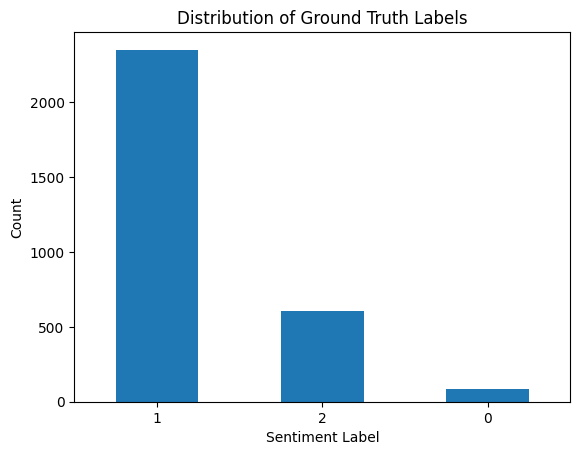

In [9]:
import matplotlib.pyplot as plt

# Display the class distribution of the 'ground_truth' column
display(df['ground_truth'].value_counts().plot(kind='bar', title='Distribution of Ground Truth Labels'))
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# SETTING UP THE BERT EVALUATION

In [11]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

train_val_dataset, test_dataset = train_test_split(df, test_size=0.1, random_state=42)

train_dataset, val_dataset = train_test_split(train_val_dataset, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_dataset)
val_dataset = Dataset.from_pandas(val_dataset)
test_dataset = Dataset.from_pandas(test_dataset)

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_dataset['ground_truth']),
    y=train_dataset['ground_truth']
)

# Convert class weights to a dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(11.401041666666666), 1: np.float64(0.4274555750829916), 2: np.float64(1.7456140350877194)}


# BEST MODEL (distilbert-base-multilingual-cased)

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

DistilBertTokenizer = AutoTokenizer.from_pretrained('distilbert-base-multilingual-cased')

def tokenize_function(examples):
    # Explicitly convert all items in the 'suggestion' list to strings
    texts = [str(s) for s in examples["suggestion"]]
    tokenized = DistilBertTokenizer(
        texts,
        truncation=True,
        padding="max_length",
        max_length=128
    )
    # Convert ground_truth labels to integers
    tokenized["labels"] = [int(label) for label in examples["ground_truth"]]
    return tokenized

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

DistilBertModel = AutoModelForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', num_labels=3)

Map:   0%|          | 0/2189 [00:00<?, ? examples/s]

Map:   0%|          | 0/548 [00:00<?, ? examples/s]

Map:   0%|          | 0/305 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
# Performance Evaluation
from transformers import TrainingArguments, Trainer
import numpy as np
import evaluate, time
import os
import torch
os.environ["WANDB_DISABLED"] = "true"

accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels, average='weighted')
    recall = recall_metric.compute(predictions=predictions, references=labels, average='weighted')
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')

    return {
        "accuracy": accuracy["accuracy"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "f1": f1["f1"]
    }

# Define a custom compute_loss function with class weights
class WeightedLossTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # Convert class_weights_dict values to a tensor
        loss_fct = torch.nn.CrossEntropyLoss(weight=torch.tensor(list(class_weights_dict.values()), device=logits.device, dtype=logits.dtype))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

num_of_epochs = 10
batches_per_epoch = len(tokenized_train_dataset)

training_args = TrainingArguments(
    output_dir='./distilbert-results',
    num_train_epochs=num_of_epochs,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    weight_decay=0.01,
    warmup_steps=0,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    lr_scheduler_type="linear",
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to="none"
)

DistilBertTrainer = WeightedLossTrainer(
    model=DistilBertModel,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    compute_metrics=compute_metrics
)

start_time = time.time()
DistilBertTrainer.train()
end_time = time.time()

print(f"Training time: {end_time - start_time} seconds")

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.141900,0.138735,0.961679,0.964495,0.961679,0.962431
2,0.017200,0.146036,0.983577,0.984439,0.983577,0.983749
3,0.017900,0.054214,0.985401,0.987751,0.985401,0.986046
4,0.052500,0.104004,0.978102,0.979467,0.978102,0.978396
5,0.013800,0.055204,0.981752,0.982845,0.981752,0.981984
6,0.000800,0.173451,0.981752,0.982854,0.981752,0.981976
7,0.000800,0.077661,0.985401,0.985851,0.985401,0.985478
8,0.021100,0.161881,0.987226,0.987456,0.987226,0.987267
9,0.000500,0.134550,0.989051,0.989101,0.989051,0.989038
10,0.000200,0.137818,0.989051,0.989101,0.989051,0.989038


Training time: 540.5738956928253 seconds


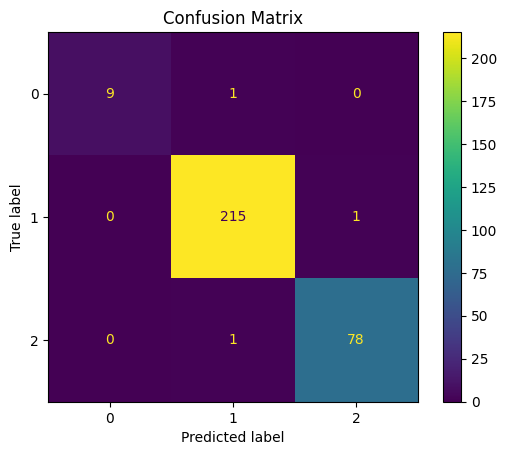


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.99      1.00      0.99       216
           2       0.99      0.99      0.99        79

    accuracy                           0.99       305
   macro avg       0.99      0.96      0.98       305
weighted avg       0.99      0.99      0.99       305



Test results: 
eval_loss: 0.27831050753593445
eval_accuracy: 0.9901639344262295
eval_precision: 0.9901941527536451
eval_recall: 0.9901639344262295
eval_f1: 0.9900890111926542
eval_runtime: 1.2944
eval_samples_per_second: 235.629
eval_steps_per_second: 15.451
epoch: 10.0


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from the trainer
predictions = DistilBertTrainer.predict(tokenized_test_dataset)
logits = predictions.predictions
labels = predictions.label_ids
predicted_labels = np.argmax(logits, axis=-1)

# Calculate and display confusion matrix
cm = confusion_matrix(labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Calculate and print classification report (includes per-label F1 scores)
report = classification_report(labels, predicted_labels, target_names=['0', '1', '2']) # Replace with your actual label names if available
print("\nClassification Report:")
print(report)

DistilBertResults = DistilBertTrainer.evaluate(eval_dataset=tokenized_test_dataset)

print("Test results: ")

for result in DistilBertResults:
  print(f"{result}: {DistilBertResults[result]}")

# Saving the model

In [21]:
import shutil
from google.colab import files
import os

# Define the paths to the saved model and tokenizer directories in Google Drive
model_drive_path = "/content/drive/My Drive/models/distilbert-base-multilingual-cased-finetuned-model"
tokenizer_drive_path = "/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer"

# Define the local paths for the zip files
model_zip_name = "distilbert_finetuned_model.zip"
tokenizer_zip_name = "distilbert_finetuned_tokenizer.zip"

# Zip the model directory
print(f"Zipping model from {model_drive_path}...")
shutil.make_archive(os.path.splitext(model_zip_name)[0], 'zip', model_drive_path)

# Zip the tokenizer directory
print(f"Zipping tokenizer from {tokenizer_drive_path}...")
shutil.make_archive(os.path.splitext(tokenizer_zip_name)[0], 'zip', tokenizer_drive_path)

# Download the zipped files
print(f"Downloading {model_zip_name}...")
files.download(model_zip_name)

print(f"Downloading {tokenizer_zip_name}...")
files.download(tokenizer_zip_name)

print("Download process initiated.")

Zipping model from /content/drive/My Drive/models/distilbert-base-multilingual-cased-finetuned-model...
Zipping tokenizer from /content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download process initiated.


In [20]:
save_path = "/content/drive/My Drive/models/distilbert-base-multilingual-cased-finetuned-model"
DistilBertTrainer.save_model(save_path)

save_path = "/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer"
DistilBertTokenizer.save_pretrained(save_path)

('/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer/vocab.txt',
 '/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer/added_tokens.json',
 '/content/drive/My Drive/models/Tokenizer/distilbert-base-multilingual-cased-finetuned-tokenizer/tokenizer.json')

# Topic Modeling (LDA and BERTopic)

# Install Required Libraries

In [ ]:
!pip install --upgrade gensim wordcloud matplotlib seaborn bertopic


In [ ]:
!pip install --upgrade hdbscan bertopic

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=SyntaxWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim import corpora
from gensim.models import LdaModel, TfidfModel, CoherenceModel
from bertopic import BERTopic
from google.colab import files


# Mount Google Drive and Load Dataset

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset file manually
print("Upload your CSV file:")
uploaded = files.upload()

# Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename)
df = df.dropna(subset=['suggestion', 'ground_truth']).reset_index(drop=True)

# Ensure 'Date submitted' is datetime
df['Date submitted'] = pd.to_datetime(df['Date submitted'], errors='coerce')

print(f"Dataset loaded: {df.shape}")
print(df.head())
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nSentiment distribution:\n{df['ground_truth'].value_counts()}")

Upload your CSV file:


Saving transformed_dataset_with_ground_truth_topic.csv to transformed_dataset_with_ground_truth_topic.csv
Dataset loaded: (3042, 3)
                                        suggestion  ground_truth  \
0                                             nice             2   
1                                  everything okay             2   
2  explaining send student s emails won t confused             0   
3                                     good student             2   
4                                      stay cleann             1   

  Date submitted  
0     2025-05-30  
1     2025-05-30  
2     2025-05-30  
3     2025-05-30  
4     2025-05-30  

Columns: ['suggestion', 'ground_truth', 'Date submitted']

Sentiment distribution:
ground_truth
1    2349
2     605
0      88
Name: count, dtype: int64


# Split Dataset by Sentiment Classes

In [ ]:
# Split by sentiment class (adjust based on your labels)
# Assuming: 0=negative, 1=neutral, 2=positive
positive_dataset = df[df['ground_truth'] == 2].copy()
neutral_dataset = df[df['ground_truth'] == 1].copy()
negative_dataset = df[df['ground_truth'] == 0].copy()

print(f"Positive samples: {len(positive_dataset)}")
print(f"Neutral samples: {len(neutral_dataset)}")
print(f"Negative samples: {len(negative_dataset)}")

Positive samples: 605
Neutral samples: 2349
Negative samples: 88


# Defining Helper Functions for LDA Topic Modeling

In [ ]:
def run_lda_topic_modeling(dataset, text_column, sentiment_label, use_tfidf=False, num_topics_range=range(2, 6)):
    """
    Run LDA topic modeling on a sentiment-specific dataset.

    Parameters:
    - dataset: DataFrame containing the text data
    - text_column: Name of the column with cleaned text
    - sentiment_label: Label for the sentiment (e.g., "Positive", "Negative")
    - use_tfidf: Whether to use TF-IDF weighting (default: False for BoW)
    - num_topics_range: Range of topic numbers to test
    """
    print(f"\n{'='*80}")
    print(f"LDA Topic Modeling for {sentiment_label} Sentiment ({'TF-IDF' if use_tfidf else 'BoW'})")
    print(f"{'='*80}\n")

    # Tokenize text
    dataset = dataset.copy()
    dataset.loc[:, 'tokenized_text'] = dataset[text_column].apply(lambda x: str(x).split())

    # Create dictionary and corpus
    dictionary = corpora.Dictionary(dataset["tokenized_text"])
    corpus = [dictionary.doc2bow(doc) for doc in dataset["tokenized_text"]]

    # Apply TF-IDF if requested
    if use_tfidf:
        tfidf_model = TfidfModel(corpus)
        corpus = tfidf_model[corpus]

    best_model = None
    best_coherence = -float('inf')
    best_num_topics = 0

    # Test different numbers of topics
    for num_topics in num_topics_range:
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            passes=10,
            random_state=42
        )

        coherence_model = CoherenceModel(
            model=lda_model,
            corpus=corpus,
            dictionary=dictionary,
            coherence='u_mass'
        )
        coherence_score = coherence_model.get_coherence()

        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

        # Display topics - FIXED: Properly handle the tuple format
        print(f"Topics for {num_topics} topics:")
        topics_list = lda_model.show_topics(num_topics=num_topics, num_words=5, formatted=False)
        for idx, topic in topics_list:
            # topic is a list of tuples: [(word, probability), ...]
            topic_words = [word for word, prob in topic]
            print(f"  Topic {idx}: {', '.join(topic_words)}")
        print()

        # Track best model
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = lda_model
            best_num_topics = num_topics

    print(f"Best model: {best_num_topics} topics with coherence score {best_coherence:.4f}\n")
    return best_model, best_num_topics, dictionary, dataset


# Defining LDA Visualization Functions

In [ ]:
def plot_topic_distribution(lda_model, num_topics, sentiment_label, model_type="BoW"):
    """Plot word distribution for each topic as horizontal bar charts."""
    for i in range(num_topics):
        words = lda_model.show_topic(i, topn=20)
        word_freq = {word: prob for word, prob in words}
        words_sorted = sorted(word_freq.items(), key=lambda x: x, reverse=True)
        words, probs = zip(*words_sorted)

        plt.figure(figsize=(10, 5))
        plt.barh(words, probs, color='skyblue')
        plt.xlabel('Probability')
        plt.title(f"{sentiment_label} ({model_type}) - Topic {i} Word Distribution")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


def plot_topic_wordcloud(lda_model, num_topics, sentiment_label, model_type="BoW"):
    """Generate word clouds for each topic."""
    for i in range(num_topics):
        words = lda_model.show_topic(i, topn=20)
        word_freq = {word: prob for word, prob in words}

        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white'
        ).generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"{sentiment_label} ({model_type}) - Topic {i}")
        plt.axis("off")
        plt.tight_layout()
        plt.show()


# BoW LDA on Positive Sentiment

In [ ]:
positive_bow_model, positive_bow_topics, positive_dict, positive_data_bow = run_lda_topic_modeling(
    dataset=positive_dataset,
    text_column='suggestion',  # Adjust to your text column name
    sentiment_label='Positive',
    use_tfidf=False,
    num_topics_range=range(2, 6)
)


LDA Topic Modeling for Positive Sentiment (BoW)

Num Topics: 2, Coherence Score: -8.3109
Topics for 2 topics:
  Topic 0: better, s, it, r, service
  Topic 1: good, satisfied, n, service, everything

Num Topics: 3, Coherence Score: -9.8397
Topics for 3 topics:
  Topic 0: s, it, r, service, staff
  Topic 1: good, everything, great, keep, n
  Topic 2: satisfied, better, i, service, m

Num Topics: 4, Coherence Score: -10.5026
Topics for 4 topics:
  Topic 0: s, it, good, service, r
  Topic 1: good, everything, great, keep, none,
  Topic 2: satisfied, i, n, service, m
  Topic 3: better, okay, nice, students, t

Num Topics: 5, Coherence Score: -10.9696
Topics for 5 topics:
  Topic 0: s, it, service, good, r
  Topic 1: good, everything, keep, great, none.
  Topic 2: satisfied, n, r, i, m
  Topic 3: better, nice, okay, t, wifi
  Topic 4: good, us, better, would, service

Best model: 2 topics with coherence score -8.3109



# Visualize Positive BoW Topics

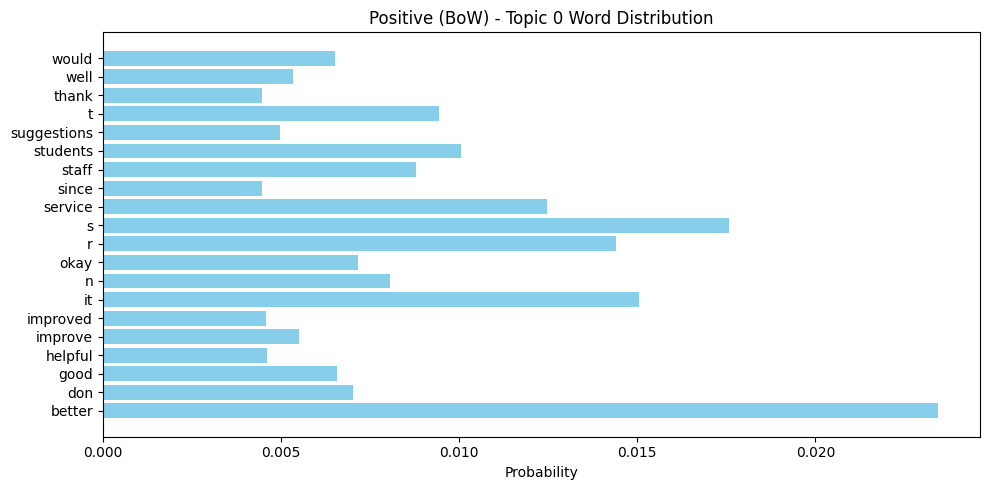

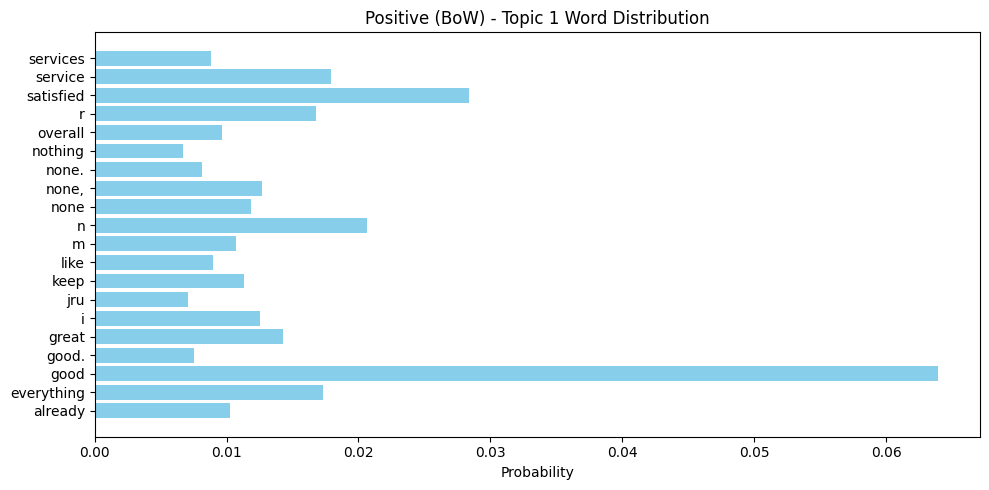

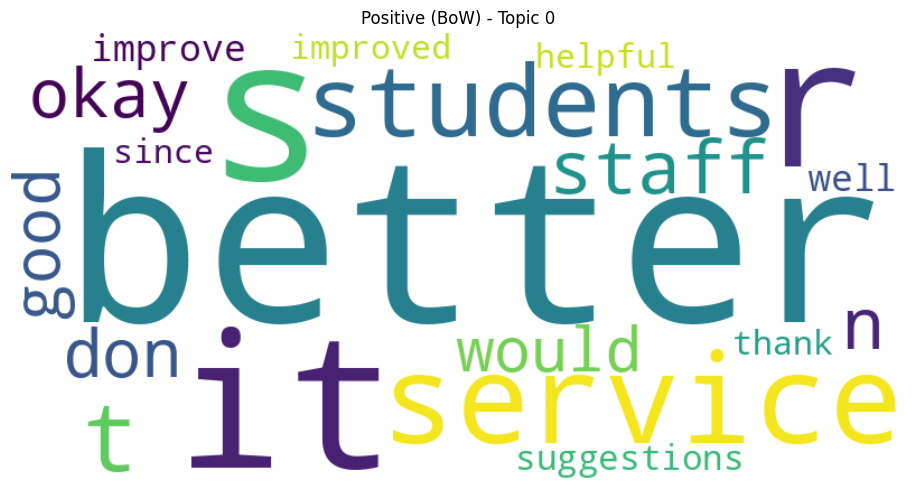

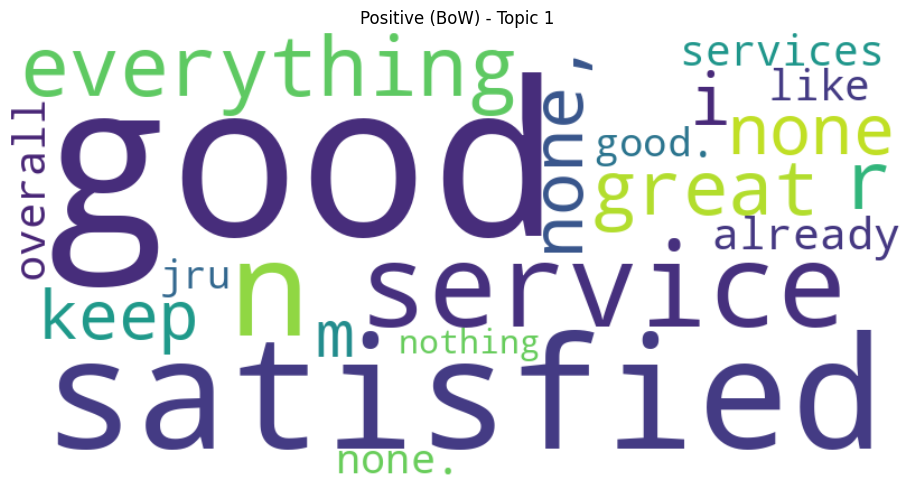

In [ ]:
plot_topic_distribution(positive_bow_model, positive_bow_topics, "Positive", "BoW")
plot_topic_wordcloud(positive_bow_model, positive_bow_topics, "Positive", "BoW")

# Run BoW LDA on Negative Sentiment

In [ ]:
negative_bow_model, negative_bow_topics, negative_dict, negative_data_bow = run_lda_topic_modeling(
    dataset=negative_dataset,
    text_column='suggestion',
    sentiment_label='Negative',
    use_tfidf=False,
    num_topics_range=range(2, 6)
)


LDA Topic Modeling for Negative Sentiment (BoW)

Num Topics: 2, Coherence Score: -13.7189
Topics for 2 topics:
  Topic 0: po, problem, s, student, issues
  Topic 1: slow, internet, wifi, issues, t

Num Topics: 3, Coherence Score: -14.2150
Topics for 3 topics:
  Topic 0: problem, student, s, technical, make
  Topic 1: slow, internet, wifi, connection, jru
  Topic 2: po, issues, slow, r, s

Num Topics: 4, Coherence Score: -15.6006
Topics for 4 topics:
  Topic 0: s, wifi, problem, student, hard
  Topic 1: slow, internet, wifi, service, connection
  Topic 2: po, slow, time, jru, yet
  Topic 3: issues, r, staff, student, problem

Num Topics: 5, Coherence Score: -15.7144
Topics for 5 topics:
  Topic 0: s, problem, hard, student, requests
  Topic 1: slow, internet, wifi, connection, issues
  Topic 2: po, slow, services, time, issues
  Topic 3: r, issues, technical, student, s
  Topic 4: slow, wifi, yet, especially, internet

Best model: 2 topics with coherence score -13.7189



# Visualize Negative BoW Topics

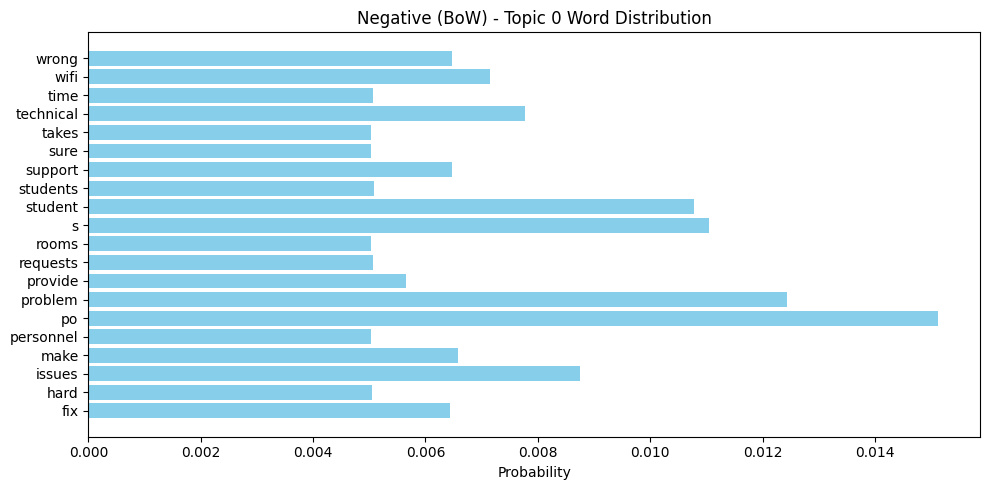

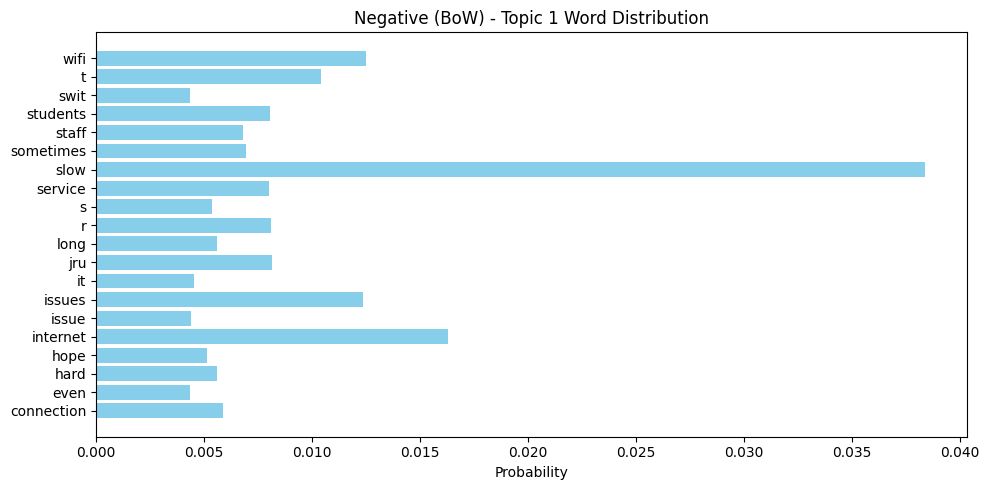

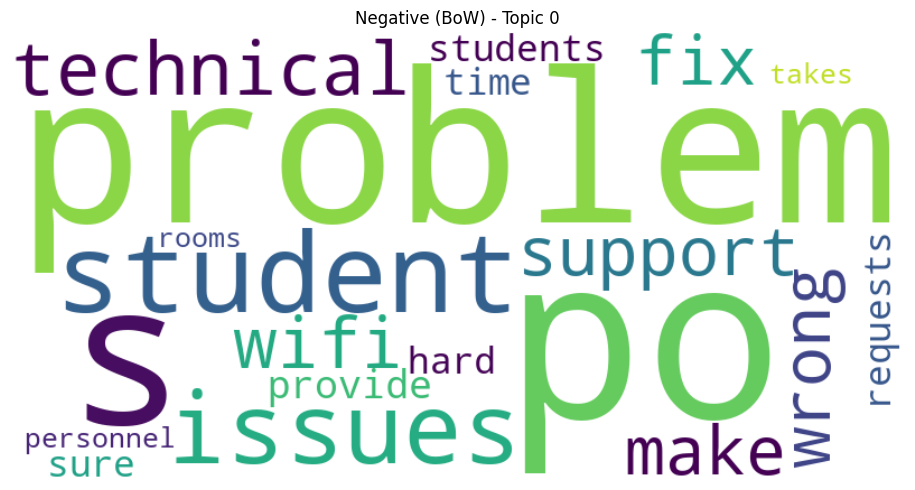

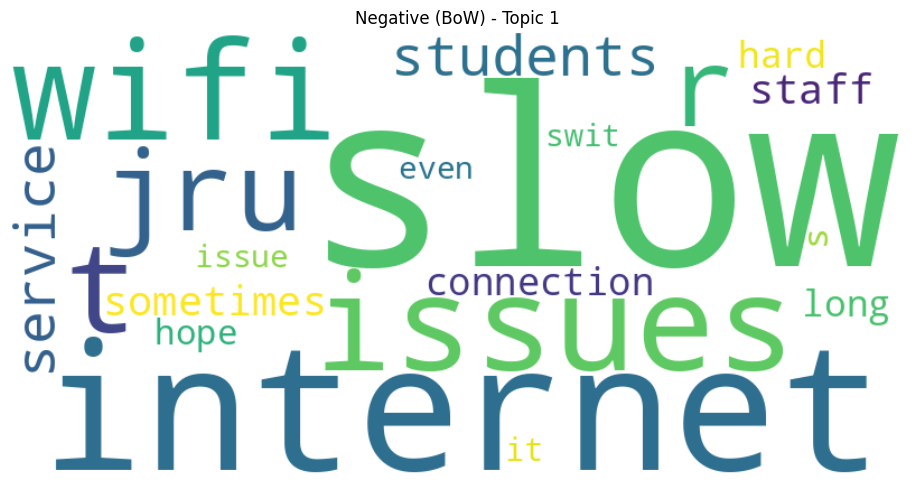

In [ ]:
plot_topic_distribution(negative_bow_model, negative_bow_topics, "Negative", "BoW")
plot_topic_wordcloud(negative_bow_model, negative_bow_topics, "Negative", "BoW")

# Run TF-IDF LDA on Positive Sentiment

In [ ]:
positive_tfidf_model, positive_tfidf_topics, _, positive_data_tfidf = run_lda_topic_modeling(
    dataset=positive_dataset,
    text_column='suggestion',
    sentiment_label='Positive',
    use_tfidf=True,
    num_topics_range=range(2, 6)
)


LDA Topic Modeling for Positive Sentiment (TF-IDF)

Num Topics: 2, Coherence Score: -10.1471
Topics for 2 topics:
  Topic 0: good, service, better, s, it
  Topic 1: satisfied, good, none, keep, n

Num Topics: 3, Coherence Score: -12.6902
Topics for 3 topics:
  Topic 0: good, s, r, it, n
  Topic 1: good, services, none., everything, great
  Topic 2: satisfied, none, overall, already, i

Num Topics: 4, Coherence Score: -12.4685
Topics for 4 topics:
  Topic 0: good, s, it, r, none,
  Topic 1: good, none., everything, keep, far
  Topic 2: satisfied, none, i, m, already
  Topic 3: nice, better, excellent, work, keep

Num Topics: 5, Coherence Score: -13.7412
Topics for 5 topics:
  Topic 0: s, it, r, n, good
  Topic 1: good, everything, far, great, none.
  Topic 2: satisfied, none, i, m, already
  Topic 3: nice, better, good., okay, work
  Topic 4: perfect, love, excellent, service, make

Best model: 2 topics with coherence score -10.1471



# Visualize Positive TF-IDF Topics

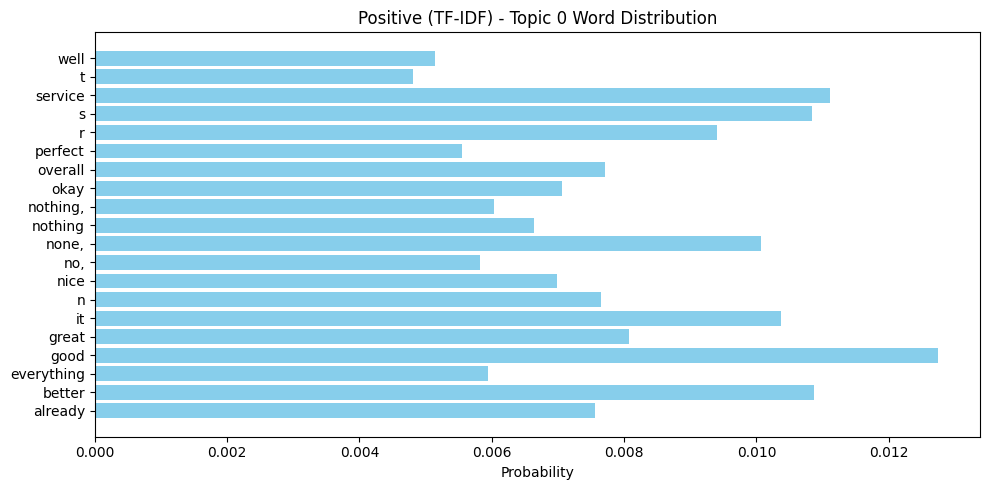

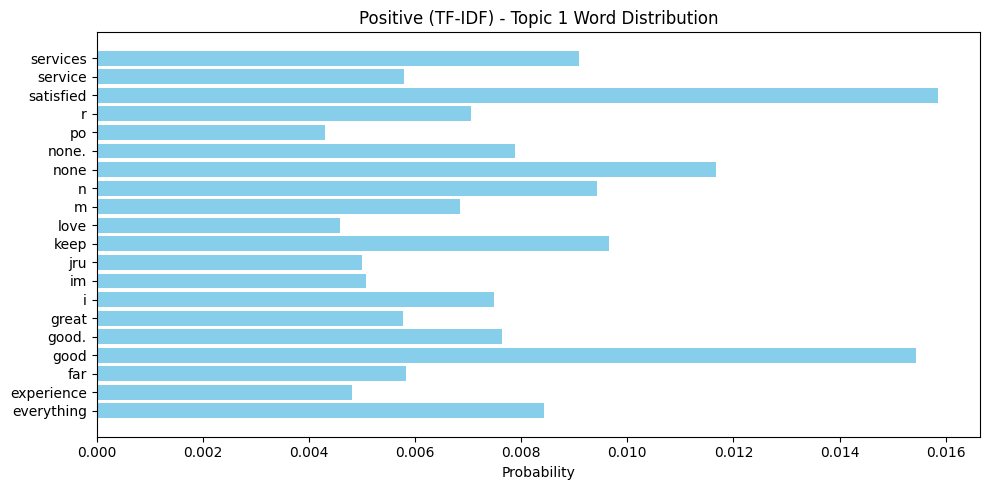

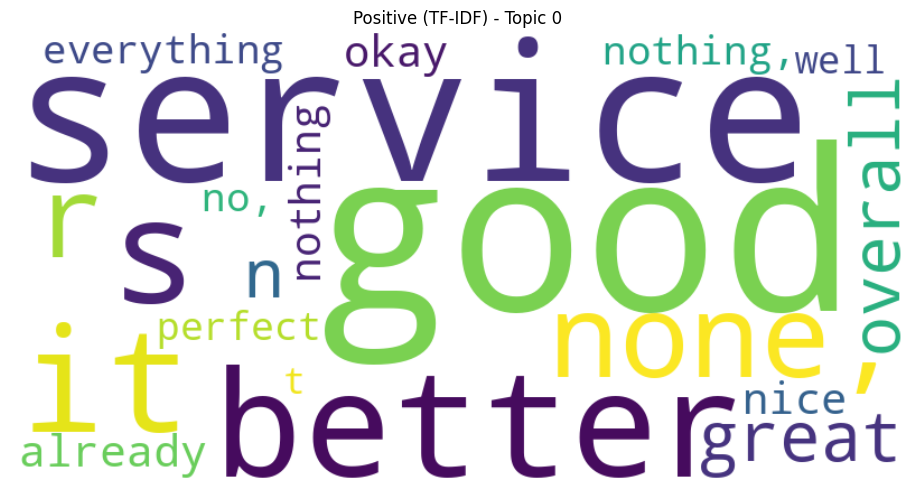

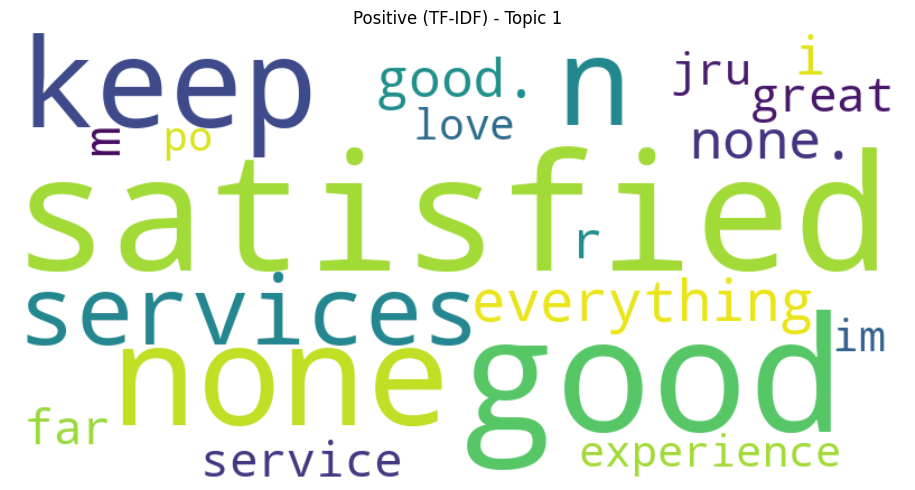

In [ ]:
plot_topic_distribution(positive_tfidf_model, positive_tfidf_topics, "Positive", "TF-IDF")
plot_topic_wordcloud(positive_tfidf_model, positive_tfidf_topics, "Positive", "TF-IDF")


# Run TF-IDF LDA on Negative Sentiment

In [ ]:
negative_tfidf_model, negative_tfidf_topics, _, negative_data_tfidf = run_lda_topic_modeling(
    dataset=negative_dataset,
    text_column='suggestion',
    sentiment_label='Negative',
    use_tfidf=True,
    num_topics_range=range(2, 6)
)


LDA Topic Modeling for Negative Sentiment (TF-IDF)

Num Topics: 2, Coherence Score: -18.6142
Topics for 2 topics:
  Topic 0: problem, fix, poor, technical, parking
  Topic 1: slow, internet, wifi, connection, jru

Num Topics: 3, Coherence Score: -19.1701
Topics for 3 topics:
  Topic 0: problem, parking, wrong, student, fix
  Topic 1: slow, internet, wifi, connection, jru
  Topic 2: poor, issues, service, attentive, services

Num Topics: 4, Coherence Score: -19.3093
Topics for 4 topics:
  Topic 0: problem, parking, fix, examinations, s
  Topic 1: slow, internet, wifi, connection, jru
  Topic 2: sometimes, email, comnection, all., po
  Topic 3: poor, technical, issues, attentive, support

Num Topics: 5, Coherence Score: -18.8246
Topics for 5 topics:
  Topic 0: problem, fix, wrong, double, get
  Topic 1: slow, internet, wifi, bad, jru
  Topic 2: connection, slow, internet, services, comnection
  Topic 3: service, technical, issues, poor, make
  Topic 4: poor, pc, yhe, internet,, solve

B

# Visualize Negative TF-IDF Topics

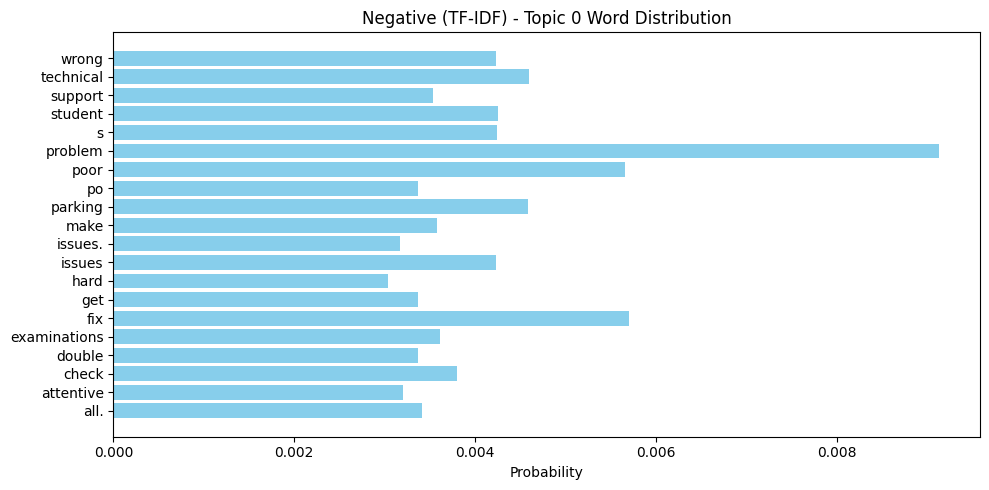

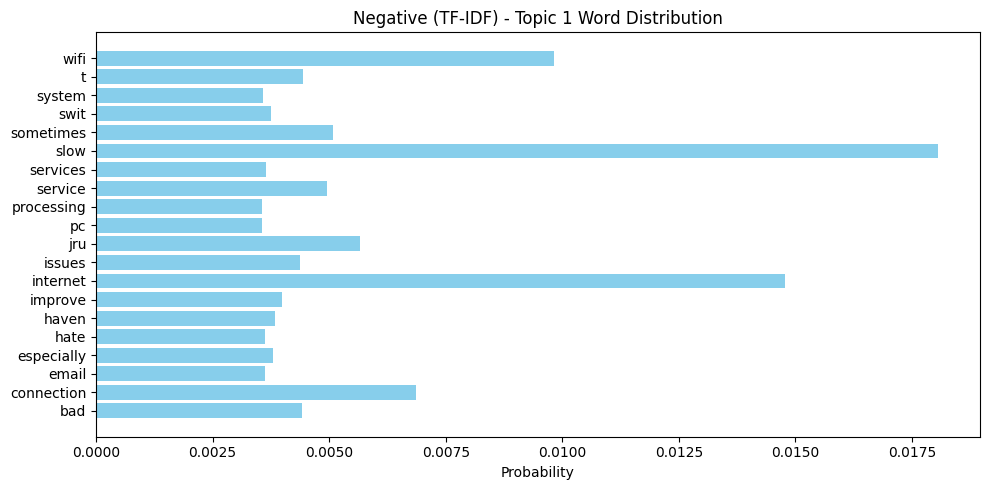

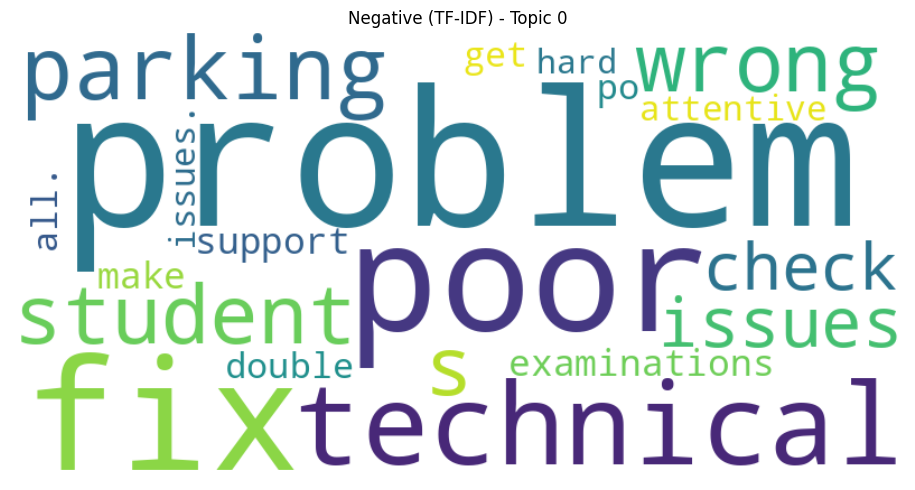

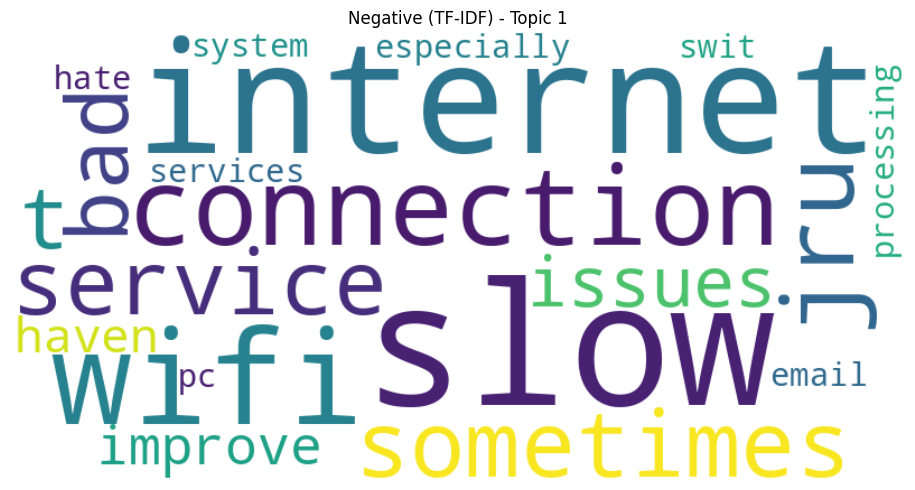

In [ ]:
plot_topic_distribution(negative_tfidf_model, negative_tfidf_topics, "Negative", "TF-IDF")
plot_topic_wordcloud(negative_tfidf_model, negative_tfidf_topics, "Negative", "TF-IDF")

# Add LDA Topic Assignments to Original DataFrame

In [ ]:
# Function to assign dominant topic to each document
def get_dominant_topics(lda_model, corpus):
    """Get the dominant (most probable) topic for each document."""
    dominant_topics = []
    for doc_topics in lda_model.get_document_topics(corpus):
        if doc_topics:
            dominant_topic = max(doc_topics, key=lambda x: x)
            dominant_topics.append(dominant_topic)
        else:
            dominant_topics.append(-1)
    return dominant_topics

# Create BoW corpus for positive and negative datasets
positive_bow_docs = [positive_dict.doc2bow(doc) for doc in positive_data_bow['tokenized_text']]
negative_bow_docs = [negative_dict.doc2bow(doc) for doc in negative_data_bow['tokenized_text']]

# Get dominant topics
positive_dataset['dominant_topic_lda_bow'] = get_dominant_topics(positive_bow_model, positive_bow_docs)
negative_dataset['dominant_topic_lda_bow'] = get_dominant_topics(negative_bow_model, negative_bow_docs)

print("LDA dominant topics assigned to datasets.")


LDA dominant topics assigned to datasets.


# BERTopic on Positive Sentiment

In [ ]:
print("\n" + "="*80)
print("BERTopic Modeling for Positive Sentiment")
print("="*80 + "\n")

# Initialize BERTopic model
positive_bertopic_model = BERTopic(
    min_topic_size=10,
    verbose=True,
    calculate_probabilities=True
)

# Get documents and fit model
positive_documents = positive_dataset['suggestion'].tolist()
positive_topics, positive_probabilities = positive_bertopic_model.fit_transform(positive_documents)

# Add to dataset
positive_dataset['topic_bertopic'] = positive_topics

# Extract the maximum probability for each document (probability of dominant topic)
# positive_probabilities is a 2D array, so we take the max across topics for each document
positive_dataset['topic_probability_bertopic'] = positive_probabilities.max(axis=1)

print("\nBERTopic model trained on positive sentiment.")
print("\nBERTopic Topic Info (first 10 topics):\n")
print(positive_bertopic_model.get_topic_info().head(10))


2025-11-18 10:18:23,510 - BERTopic - Embedding - Transforming documents to embeddings.



BERTopic Modeling for Positive Sentiment



Batches:   0%|          | 0/19 [00:00<?, ?it/s]

2025-11-18 10:18:25,215 - BERTopic - Embedding - Completed ✓
2025-11-18 10:18:25,217 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 10:18:26,455 - BERTopic - Dimensionality - Completed ✓
2025-11-18 10:18:26,456 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 10:18:26,500 - BERTopic - Cluster - Completed ✓
2025-11-18 10:18:26,505 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 10:18:26,532 - BERTopic - Representation - Completed ✓



BERTopic model trained on positive sentiment.

BERTopic Topic Info (first 10 topics):

   Topic  Count                                Name  \
0     -1    111        -1_good_helpful_overall_like   
1      0     51      0_none_perfect_everything_okay   
2      1     44         1_students_school_hope_time   
3      2     42     2_everything_nothing_good_great   
4      3     40                3_satisfied_no_am_im   
5      4     36  4_service_suggestions_services_don   
6      5     31     5_better_connection_wifi_design   
7      6     30          6_speed_days_time_improved   
8      7     30     7_staff_canteen_like_experience   
9      8     26                    8_good_it_ok_com   

                                      Representation  \
0  [good, helpful, overall, like, po, could, libr...   
1  [none, perfect, everything, okay, great, good,...   
2  [students, school, hope, time, student, online...   
3  [everything, nothing, good, great, already, no...   
4  [satisfied, no, am, im,

# BERTopic on Negative Sentiment

In [ ]:
print("\n" + "="*80)
print("BERTopic Modeling for Negative Sentiment")
print("="*80 + "\n")

# Initialize BERTopic model
negative_bertopic_model = BERTopic(
    min_topic_size=10,
    verbose=True,
    calculate_probabilities=True
)

# Get documents and fit model
negative_documents = negative_dataset['suggestion'].tolist()
negative_topics, negative_probabilities = negative_bertopic_model.fit_transform(negative_documents)

# Add to dataset
negative_dataset['topic_bertopic'] = negative_topics

# Extract the maximum probability for each document
negative_dataset['topic_probability_bertopic'] = negative_probabilities.max(axis=1)

print("\nBERTopic model trained on negative sentiment.")
print("\nBERTopic Topic Info (first 10 topics):\n")
print(negative_bertopic_model.get_topic_info().head(10))


2025-11-18 10:18:33,554 - BERTopic - Embedding - Transforming documents to embeddings.



BERTopic Modeling for Negative Sentiment



Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-11-18 10:18:34,910 - BERTopic - Embedding - Completed ✓
2025-11-18 10:18:34,911 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-18 10:18:35,048 - BERTopic - Dimensionality - Completed ✓
2025-11-18 10:18:35,049 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-18 10:18:35,059 - BERTopic - Cluster - Completed ✓
2025-11-18 10:18:35,062 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-18 10:18:35,073 - BERTopic - Representation - Completed ✓



BERTopic model trained on negative sentiment.

BERTopic Topic Info (first 10 topics):

   Topic  Count                             Name  \
0     -1     10         -1_service_slow_wifi_bit   
1      0     43     0_issues_students_po_problem   
2      1     35  1_slow_internet_wifi_connection   

                                      Representation  \
0  [service, slow, wifi, bit, examinations, it, h...   
1  [issues, students, po, problem, student, staff...   
2  [slow, internet, wifi, connection, it, sometim...   

                                 Representative_Docs  
0  [internet slow examinations, also building c r...  
1  [newly enrolled student already encountered te...  
2  [slow internet, internet slow, wifi internet s...  


# Visualize BERTopic Topics

In [ ]:
# Visualize BERTopic topics for positive sentiment
print("BERTopic Positive Sentiment - Topics Visualization")
try:
    fig_pos = positive_bertopic_model.visualize_topics()
    fig_pos.show()
except Exception as e:
    print(f"Could not visualize positive topics: {e}")
    print("Topics info instead:")
    print(positive_bertopic_model.get_topic_info())

# Visualize BERTopic topics for negative sentiment
print("\nBERTopic Negative Sentiment - Topics Visualization")
try:
    fig_neg = negative_bertopic_model.visualize_topics()
    fig_neg.show()
except Exception as e:
    print(f"Could not visualize negative topics: {e}")
    print("Topics info instead:")
    print(negative_bertopic_model.get_topic_info())


BERTopic Positive Sentiment - Topics Visualization



BERTopic Negative Sentiment - Topics Visualization
Could not visualize negative topics: zero-size array to reduction operation maximum which has no identity
Topics info instead:
   Topic  Count                             Name  \
0     -1     10         -1_service_slow_wifi_bit   
1      0     43     0_issues_students_po_problem   
2      1     35  1_slow_internet_wifi_connection   

                                      Representation  \
0  [service, slow, wifi, bit, examinations, it, h...   
1  [issues, students, po, problem, student, staff...   
2  [slow, internet, wifi, connection, it, sometim...   

                                 Representative_Docs  
0  [internet slow examinations, also building c r...  
1  [newly enrolled student already encountered te...  
2  [slow internet, internet slow, wifi internet s...  


BERTopic Positive Sentiment - Topics Summary



BERTopic Negative Sentiment - Topics Summary
Default visualization failed. Showing topic info instead:
   Topic  Count                             Name  \
0     -1     10         -1_service_slow_wifi_bit   
1      0     43     0_issues_students_po_problem   
2      1     35  1_slow_internet_wifi_connection   

                                      Representation  \
0  [service, slow, wifi, bit, examinations, it, h...   
1  [issues, students, po, problem, student, staff...   
2  [slow, internet, wifi, connection, it, sometim...   

                                 Representative_Docs  
0  [internet slow examinations, also building c r...  
1  [newly enrolled student already encountered te...  
2  [slow internet, internet slow, wifi internet s...  


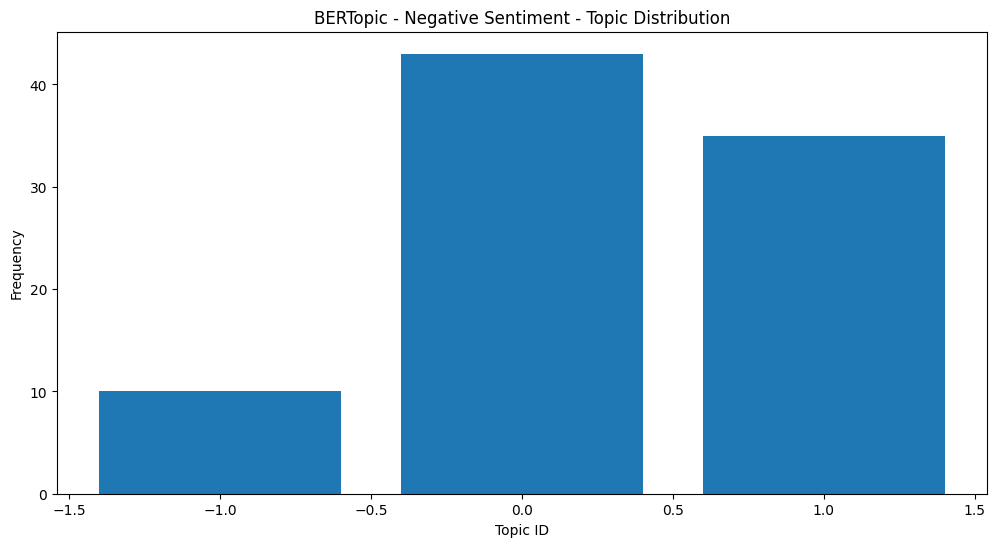

In [ ]:
import matplotlib.pyplot as plt

# For Positive Sentiment
print("BERTopic Positive Sentiment - Topics Summary")
try:
    fig_pos = positive_bertopic_model.visualize_topics()
    fig_pos.show()
except:
    print("Default visualization failed. Showing topic info instead:")
    pos_info = positive_bertopic_model.get_topic_info()
    print(pos_info.head(15))

    # Simple bar chart of topic frequencies
    plt.figure(figsize=(12, 6))
    plt.bar(pos_info['Topic'], pos_info['Count'])
    plt.xlabel('Topic ID')
    plt.ylabel('Frequency')
    plt.title('BERTopic - Positive Sentiment - Topic Distribution')
    plt.show()

# For Negative Sentiment
print("\nBERTopic Negative Sentiment - Topics Summary")
try:
    fig_neg = negative_bertopic_model.visualize_topics()
    fig_neg.show()
except:
    print("Default visualization failed. Showing topic info instead:")
    neg_info = negative_bertopic_model.get_topic_info()
    print(neg_info.head(15))

    # Simple bar chart of topic frequencies
    plt.figure(figsize=(12, 6))
    plt.bar(neg_info['Topic'], neg_info['Count'])
    plt.xlabel('Topic ID')
    plt.ylabel('Frequency')
    plt.title('BERTopic - Negative Sentiment - Topic Distribution')
    plt.show()


# Generate Temporal Trends for LDA (Positive)

In [ ]:
# LDA Temporal Trends - Positive Sentiment
positive_dataset['Year'] = positive_dataset['Date submitted'].dt.year
positive_dataset['Month'] = positive_dataset['Date submitted'].dt.month

lda_temporal_trends_positive = positive_dataset.groupby(
    ['Year', 'Month', 'dominant_topic_lda_bow']
).size().reset_index(name='count')

lda_temporal_trends_positive['percentage'] = lda_temporal_trends_positive.groupby(
    ['Year', 'Month']
)['count'].transform(lambda x: x / x.sum() * 100)

print("LDA Temporal Trends (Positive Sentiment):")
print(lda_temporal_trends_positive.head(10))

LDA Temporal Trends (Positive Sentiment):
     Year  Month dominant_topic_lda_bow  count  percentage
0  2024.0    4.0       (1, 0.056263514)      1    5.263158
1  2024.0    4.0        (1, 0.14465955)      1    5.263158
2  2024.0    4.0         (1, 0.4849826)      1    5.263158
3  2024.0    4.0         (1, 0.5960573)      1    5.263158
4  2024.0    4.0         (1, 0.7659043)      1    5.263158
5  2024.0    4.0         (1, 0.7847901)      1    5.263158
6  2024.0    4.0        (1, 0.82705164)      1    5.263158
7  2024.0    4.0        (1, 0.83232594)      1    5.263158
8  2024.0    4.0         (1, 0.8409064)      1    5.263158
9  2024.0    4.0        (1, 0.86138064)      1    5.263158


# Generate Temporal Trends for LDA (Negative)

In [ ]:
# LDA Temporal Trends - Negative Sentiment
negative_dataset['Year'] = negative_dataset['Date submitted'].dt.year
negative_dataset['Month'] = negative_dataset['Date submitted'].dt.month

lda_temporal_trends_negative = negative_dataset.groupby(
    ['Year', 'Month', 'dominant_topic_lda_bow']
).size().reset_index(name='count')

lda_temporal_trends_negative['percentage'] = lda_temporal_trends_negative.groupby(
    ['Year', 'Month']
)['count'].transform(lambda x: x / x.sum() * 100)

print("LDA Temporal Trends (Negative Sentiment):")
print(lda_temporal_trends_negative.head(10))

LDA Temporal Trends (Negative Sentiment):
   Year  Month dominant_topic_lda_bow  count  percentage
0  2024      4         (1, 0.8273848)      1        50.0
1  2024      4         (1, 0.8638018)      1        50.0
2  2024      5         (1, 0.9548359)      1       100.0
3  2024     11         (1, 0.8637969)      1        50.0
4  2024     11        (1, 0.94979733)      1        50.0
5  2025      2       (1, 0.040897407)      1        25.0
6  2025      2         (1, 0.7352086)      1        25.0
7  2025      2         (1, 0.8972565)      1        25.0
8  2025      2        (1, 0.91928196)      1        25.0
9  2025      3        (0, 0.99198896)      1         2.0


In [ ]:
# Generate topics over time for positive sentiment
positive_dataset_filtered = positive_dataset[positive_dataset['topic_bertopic'] != -1].copy()
positive_dataset_filtered = positive_dataset_filtered.dropna(subset=['Date submitted'])

positive_documents_filtered = positive_dataset_filtered['suggestion'].tolist()
positive_dates_filtered = positive_dataset_filtered['Date submitted'].tolist()
positive_topics_filtered = positive_dataset_filtered['topic_bertopic'].tolist()

# Topics over time
positive_topics_over_time = positive_bertopic_model.topics_over_time(
    positive_documents_filtered,
    positive_dates_filtered,
    topics=positive_topics_filtered,
    nr_bins=12,
    global_tuning=True,
    evolution_tuning=True
)

print("BERTopic Topics Over Time (Positive) generated successfully.")
print(positive_topics_over_time.head())


12it [00:00, 88.14it/s]

BERTopic Topics Over Time (Positive) generated successfully.
   Topic                                              Words  Frequency  \
0      0                         none, hehe, went, sll, end          5   
1      1                   every, outlet, none, table, tech          2   
2      2          everythig, cause, seems, everything, fast          3   
3      3  nothing, satisfied, already, suggestions, ever...          2   
4      4              satisfied, already, on, customer, now          3   

                Timestamp  
0 2024-04-16 14:12:28.800  
1 2024-04-16 14:12:28.800  
2 2024-04-16 14:12:28.800  
3 2024-04-16 14:12:28.800  
4 2024-04-16 14:12:28.800  


# Generate Temporal Trends for BERTopic (Negative)

In [ ]:
# Generate topics over time for negative sentiment
negative_dataset_filtered = negative_dataset[negative_dataset['topic_bertopic'] != -1].copy()
negative_dataset_filtered = negative_dataset_filtered.dropna(subset=['Date submitted'])

negative_documents_filtered = negative_dataset_filtered['suggestion'].tolist()
negative_dates_filtered = negative_dataset_filtered['Date submitted'].tolist()
negative_topics_filtered = negative_dataset_filtered['topic_bertopic'].tolist()

# Topics over time
negative_topics_over_time = negative_bertopic_model.topics_over_time(
    negative_documents_filtered,
    negative_dates_filtered,
    topics=negative_topics_filtered,
    nr_bins=12,
    global_tuning=True,
    evolution_tuning=True
)

print("BERTopic Topics Over Time (Negative) generated successfully.")
print(negative_topics_over_time.head())


5it [00:00, 156.57it/s]

BERTopic Topics Over Time (Negative) generated successfully.
   Topic                                       Words  Frequency  \
0      0  talk, smile, assisted, approachable, faces          1   
1      1      pc, slow, connection, internet, issues          2   
2      1     connection, earn, tons, literally, cash          2   
3      0  service, slow, problem, examinations, wifi         22   
4      1            slow, internet, wifi, issues, it         20   

                Timestamp  
0 2024-04-16 14:12:28.800  
1 2024-04-16 14:12:28.800  
2 2024-11-07 00:00:00.000  
3 2025-02-17 00:00:00.000  
4 2025-02-17 00:00:00.000  


# Visualize BERTopic Temporal Trends (Positive)

In [ ]:
# Get top 5 most frequent topics for positive sentiment
freq_topics_pos = positive_bertopic_model.get_topic_info()
frequent_topics_ids_pos = freq_topics_pos[freq_topics_pos.Topic != -1].head(5).Topic.tolist()

# Visualize only the most frequent topics
fig_pos_time = positive_bertopic_model.visualize_topics_over_time(
    positive_topics_over_time,
    topics=frequent_topics_ids_pos,
    title="BERTopic Topics Over Time (Positive Sentiment - Top 5)"
)
fig_pos_time.show()

print("Visualization of BERTopic topics over time (Positive) displayed.")


Visualization of BERTopic topics over time (Positive) displayed.


# Visualize BERTopic Temporal Trends (Negative)

In [ ]:
# Get top 5 most frequent topics for negative sentiment
freq_topics_neg = negative_bertopic_model.get_topic_info()
frequent_topics_ids_neg = freq_topics_neg[freq_topics_neg.Topic != -1].head(5).Topic.tolist()

# Visualize only the most frequent topics
fig_neg_time = negative_bertopic_model.visualize_topics_over_time(
    negative_topics_over_time,
    topics=frequent_topics_ids_neg,
    title="BERTopic Topics Over Time (Negative Sentiment - Top 5)"
)
fig_neg_time.show()

print("Visualization of BERTopic topics over time (Negative) displayed.")

Visualization of BERTopic topics over time (Negative) displayed.


# Process BERTopic Temporal Data for Analysis

In [ ]:
# Convert Timestamp to datetime for BERTopic positive data
positive_topics_over_time['Timestamp'] = pd.to_datetime(positive_topics_over_time['Timestamp'])
positive_topics_over_time['Year'] = positive_topics_over_time['Timestamp'].dt.year
positive_topics_over_time['Month'] = positive_topics_over_time['Timestamp'].dt.month

# Group and calculate percentages
bertopic_positive_grouped = positive_topics_over_time.groupby(
    ['Year', 'Month', 'Topic']
)['Frequency'].sum().reset_index(name='Total_Frequency')

bertopic_positive_grouped['Percentage'] = bertopic_positive_grouped.groupby(
    ['Year', 'Month']
)['Total_Frequency'].transform(lambda x: (x / x.sum()) * 100)

print("BERTopic Temporal Trends (Positive Sentiment - Percentage Prevalence):")
print(bertopic_positive_grouped.head(10))

BERTopic Temporal Trends (Positive Sentiment - Percentage Prevalence):
   Year  Month  Topic  Total_Frequency  Percentage
0  2024      4      0                5   15.151515
1  2024      4      1                2    6.060606
2  2024      4      2                3    9.090909
3  2024      4      3                2    6.060606
4  2024      4      4                3    9.090909
5  2024      4      5                1    3.030303
6  2024      4      7                7   21.212121
7  2024      4      9                5   15.151515
8  2024      4     11                3    9.090909
9  2024      4     12                1    3.030303


# Process BERTopic Temporal Data for Negative Sentiment

In [ ]:
# Convert Timestamp to datetime for BERTopic negative data
negative_topics_over_time['Timestamp'] = pd.to_datetime(negative_topics_over_time['Timestamp'])
negative_topics_over_time['Year'] = negative_topics_over_time['Timestamp'].dt.year
negative_topics_over_time['Month'] = negative_topics_over_time['Timestamp'].dt.month

# Group and calculate percentages
bertopic_negative_grouped = negative_topics_over_time.groupby(
    ['Year', 'Month', 'Topic']
)['Frequency'].sum().reset_index(name='Total_Frequency')

bertopic_negative_grouped['Percentage'] = bertopic_negative_grouped.groupby(
    ['Year', 'Month']
)['Total_Frequency'].transform(lambda x: (x / x.sum()) * 100)

print("BERTopic Temporal Trends (Negative Sentiment - Percentage Prevalence):")
print(bertopic_negative_grouped.head(10))


BERTopic Temporal Trends (Negative Sentiment - Percentage Prevalence):
   Year  Month  Topic  Total_Frequency  Percentage
0  2024      4      0                1   33.333333
1  2024      4      1                2   66.666667
2  2024     11      1                2  100.000000
3  2025      2      0               22   52.380952
4  2025      2      1               20   47.619048
5  2025      3      0               12   70.588235
6  2025      3      1                5   29.411765
7  2025      4      0                8   57.142857
8  2025      4      1                6   42.857143


# Visualize LDA Temporal Trends (Positive)

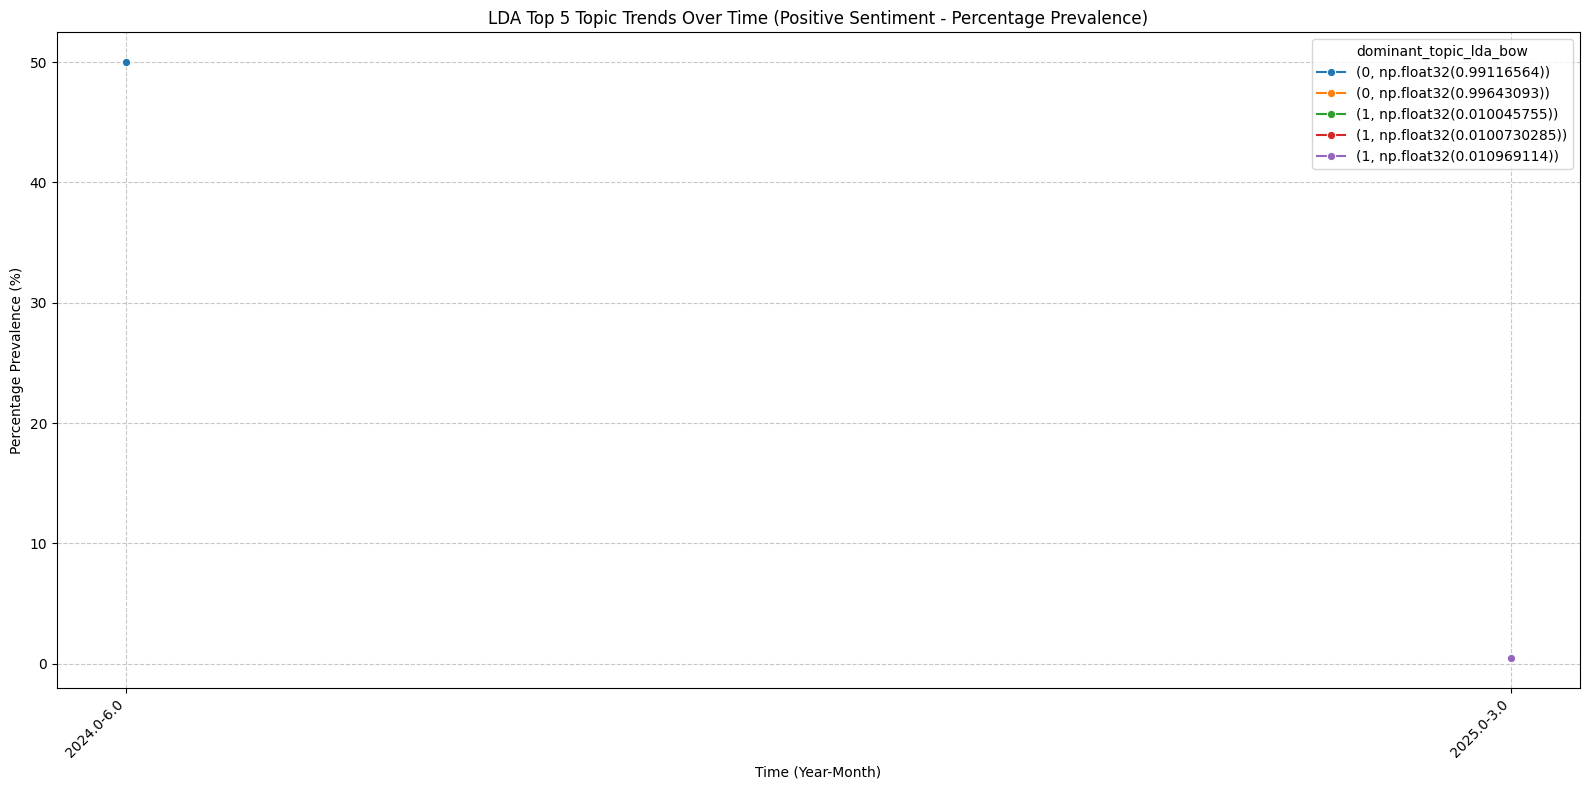

LDA top 5 topic trends over time visualization (Positive) displayed.


In [ ]:
# Get top 5 most frequent LDA topics for positive sentiment
top_n_lda_pos = lda_temporal_trends_positive.groupby(
    'dominant_topic_lda_bow'
)['count'].sum().nlargest(5).index.tolist()

lda_top_topics_pos = lda_temporal_trends_positive[
    lda_temporal_trends_positive['dominant_topic_lda_bow'].isin(top_n_lda_pos)
].copy()

lda_top_topics_pos['Time'] = (
    lda_top_topics_pos['Year'].astype(str) + '-' +
    lda_top_topics_pos['Month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=lda_top_topics_pos,
    x='Time',
    y='percentage',
    hue='dominant_topic_lda_bow',
    marker='o',
    palette='tab10'
)

plt.title('LDA Top 5 Topic Trends Over Time (Positive Sentiment - Percentage Prevalence)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Percentage Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("LDA top 5 topic trends over time visualization (Positive) displayed.")


# Visualize BERTopic Temporal Trends (Positive)

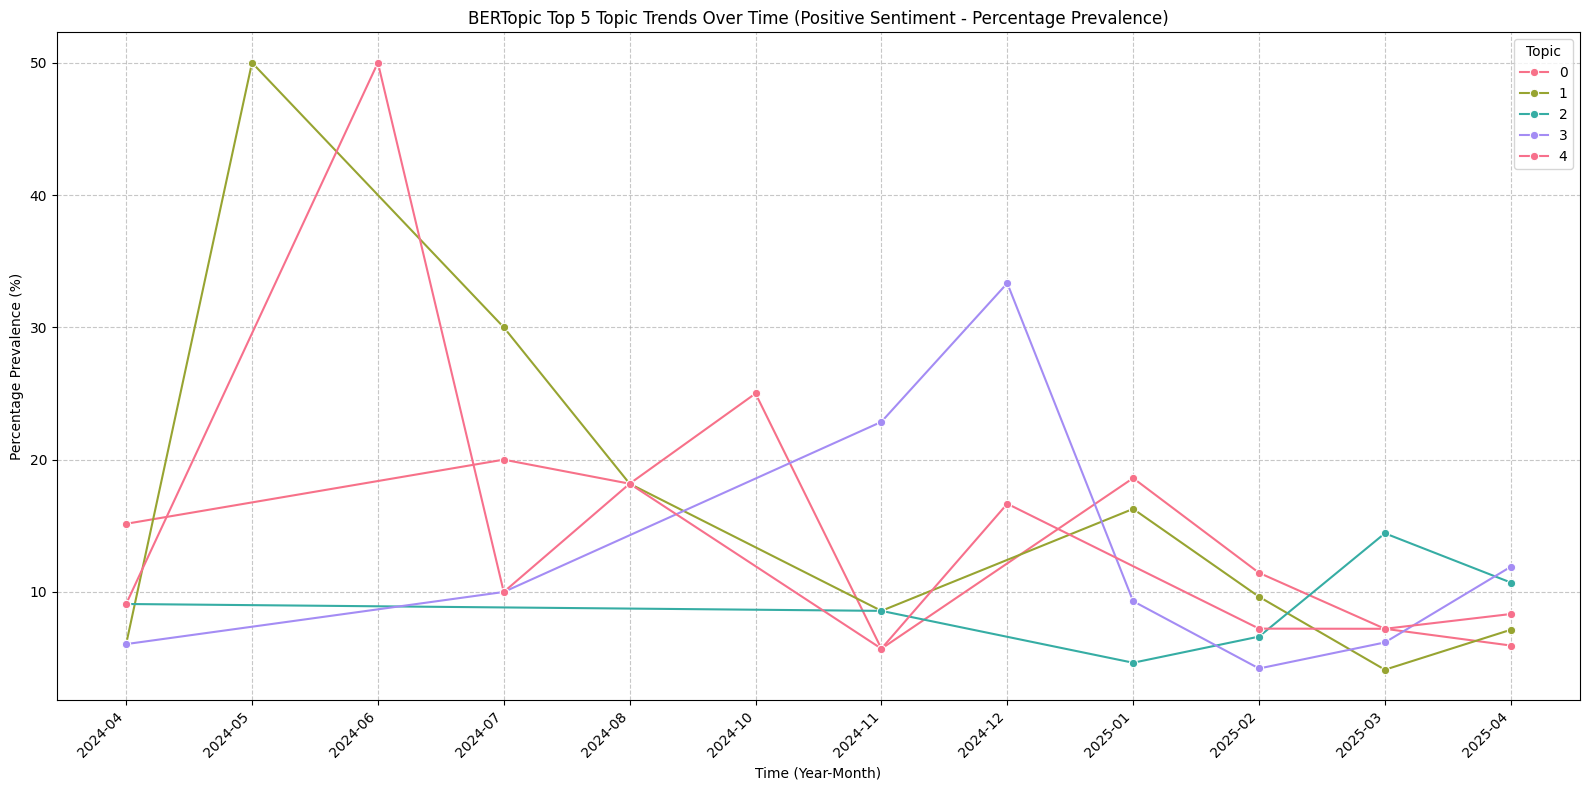

BERTopic top 5 topic trends over time visualization (Positive) displayed.


In [ ]:
# Get top 5 most frequent BERTopic topics for positive sentiment
top_n_bertopic_pos = bertopic_positive_grouped.groupby(
    'Topic'
)['Total_Frequency'].sum().nlargest(5).index.tolist()

bertopic_top_topics_pos = bertopic_positive_grouped[
    bertopic_positive_grouped['Topic'].isin(top_n_bertopic_pos)
].copy()

bertopic_top_topics_pos['Time'] = (
    bertopic_top_topics_pos['Year'].astype(str) + '-' +
    bertopic_top_topics_pos['Month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=bertopic_top_topics_pos,
    x='Time',
    y='Percentage',
    hue='Topic',
    marker='o',
    palette='husl'
)

plt.title('BERTopic Top 5 Topic Trends Over Time (Positive Sentiment - Percentage Prevalence)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Percentage Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("BERTopic top 5 topic trends over time visualization (Positive) displayed.")


# Visualize BERTopic Temporal Trends (Negative)

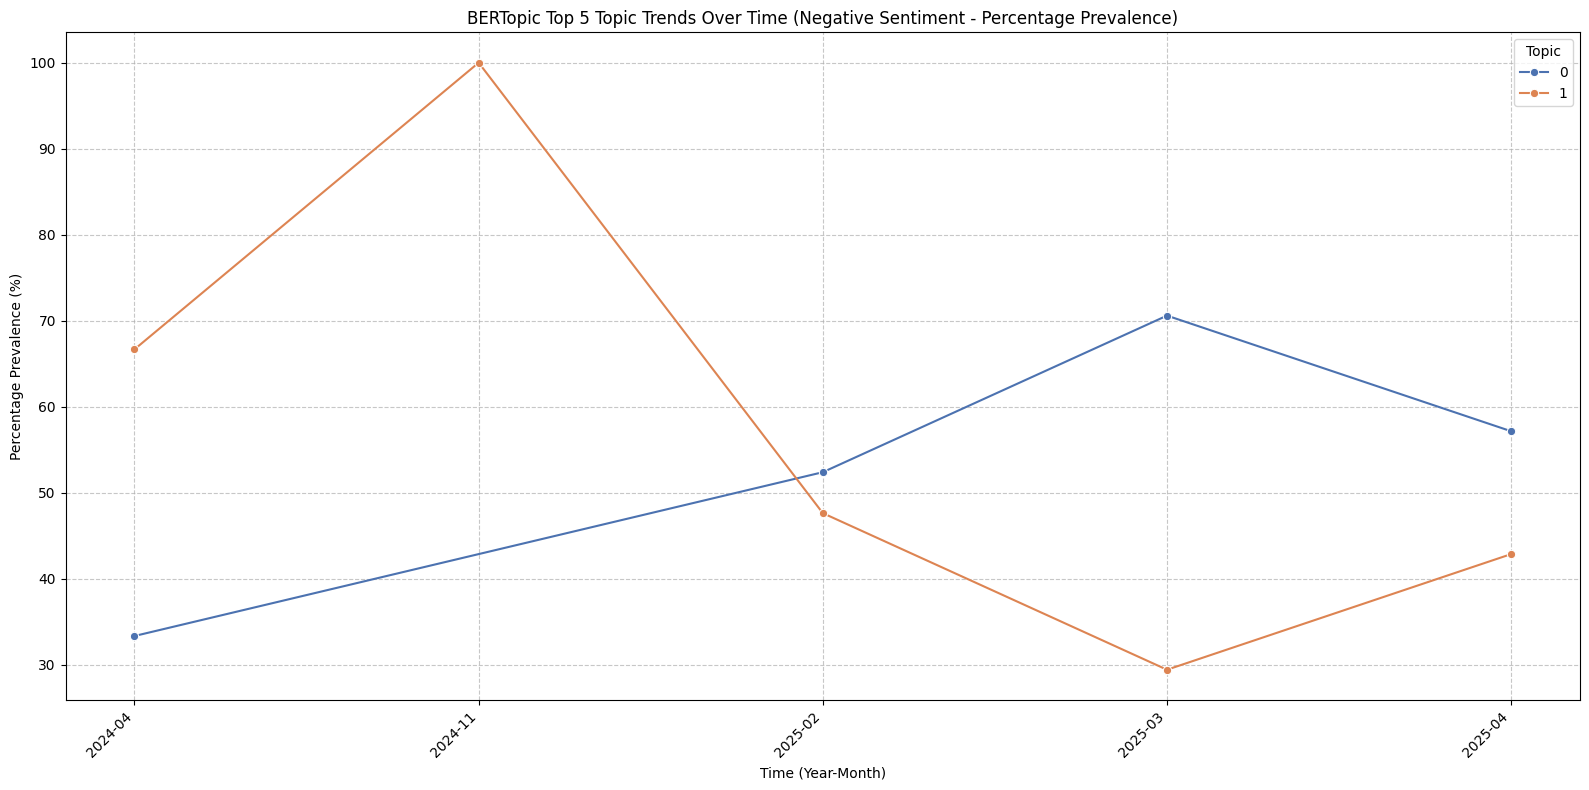

BERTopic top 5 topic trends over time visualization (Negative) displayed.


In [ ]:
# Get top 5 most frequent BERTopic topics for negative sentiment
top_n_bertopic_neg = bertopic_negative_grouped.groupby(
    'Topic'
)['Total_Frequency'].sum().nlargest(5).index.tolist()

bertopic_top_topics_neg = bertopic_negative_grouped[
    bertopic_negative_grouped['Topic'].isin(top_n_bertopic_neg)
].copy()

bertopic_top_topics_neg['Time'] = (
    bertopic_top_topics_neg['Year'].astype(str) + '-' +
    bertopic_top_topics_neg['Month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=bertopic_top_topics_neg,
    x='Time',
    y='Percentage',
    hue='Topic',
    marker='o',
    palette='deep'
)

plt.title('BERTopic Top 5 Topic Trends Over Time (Negative Sentiment - Percentage Prevalence)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Percentage Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("BERTopic top 5 topic trends over time visualization (Negative) displayed.")
